In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
period = 20

In [4]:
stock = "GOLDBEES.NS"
data = yf.download(stock,'2022-10-01','2023-05-18')

[*********************100%***********************]  1 of 1 completed


In [5]:
SMA=np.zeros(len(data))
for i in range(len(data)-period+1):
      close = data.iloc[i:i+period, data.columns.get_loc('Close')]
      SMA[i+period-1] = close.mean()
      if SMA[i]==0:
            SMA[i]=None

In [6]:

std_dev=np.zeros(len(data))
for i in range(len(data)-period+1):
      close = data.iloc[i:i+period, data.columns.get_loc('Close')]
      std_dev[i+period-1] = close.std()
      if std_dev[i]==0:
            std_dev[i]=None

In [7]:
mid_band = SMA
up_band = SMA + 2*std_dev
low_band = SMA - 2*std_dev

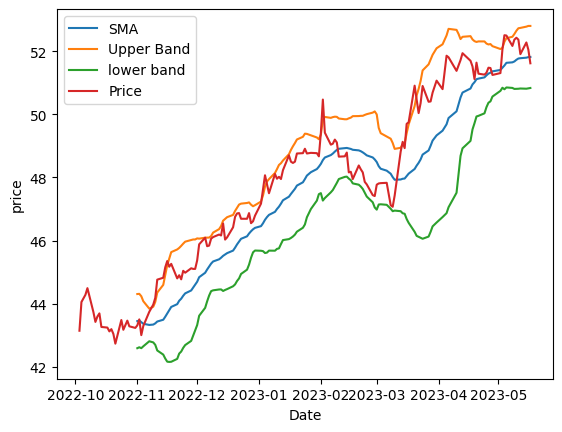

In [8]:
plt.plot(data.index,mid_band,label='SMA')
plt.plot(data.index,up_band,label='Upper Band')
plt.plot(data.index,low_band,label='lower band')
plt.plot(data.index,data['Close'],label='Price')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

In [9]:
data['mid band'] = mid_band
data['upper band'] = up_band
data['lower band'] = low_band


In [10]:
def implement_bollinger_strategy(data):    
    buy_price = []
    sell_price = []
    bollinger_signal = []
    signal = 0

    for i in range(len(data)):
        if data['Close'][i] >= data['lower band'][i] and data['Close'][i] < data['mid band'][i] :
            if signal != 1:
                buy_price.append(data['Close'][i])
                sell_price.append(np.nan)
                signal = 1
                bollinger_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bollinger_signal.append(0)
        elif data['Close'][i] <= data['upper band'][i] and data['Close'][i] > data['mid band'][i] :
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data['Close'][i])
                signal = -1
                bollinger_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bollinger_signal.append(0)
        elif data['Close'][i]==data['mid band'][i]:
            if signal == 1:
                buy_price.append(np.nan)
                sell_price.append(data['Close'][i])
                signal = -1
                bollinger_signal.append(signal)
            elif signal == -1:
                buy_price.append(data['Close'][i])
                sell_price.append(np.nan)
                signal = 1
                bollinger_signal.append(signal)

            
    return buy_price, sell_price, bollinger_signal
            
buy_price, sell_price, bollinger_signal = implement_bollinger_strategy(data)

In [11]:
bollinger_signal

[1,
 -1,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [12]:
def rsi(data, period):
    change = [0] * len(data)
    gain = [0] * len(data)
    loss = [0] * len(data)
    average_gain = [0] * len(data)
    average_loss = [0] * len(data)
    rs = [0] * len(data)
    rsi = [0] * len(data)
    
    for i in range(1,len(data)):
        change[i] = data['Close'][i] - data['Close'][i-1]
        if change[i] > 0:
            gain[i] = change[i]
            loss[i] = 0
        else:
            loss[i] = -change[i]
            gain[i] = 0
    
    for i in range(period, len(data)):
        average_gain[i] = sum(gain[i-period+1:i+1]) / period
        average_loss[i] = sum(loss[i-period+1:i+1]) / period
        rs[i] = average_gain[i] / average_loss[i]
        
        rsi[i] = 100 - (100 / (1 + rs[i]))
    data['Average Gain'] = average_gain
    data['Average Loss'] = average_loss
    return rsi

In [13]:
stock_rsi = rsi(data, 14)

data['RSI'] = stock_rsi

In [14]:
def signal_rsi(data):
    buy_price_rsi = []
    sell_price_rsi = []
    rsi_signal = []
    signal = 0

    for i in range(len(data)):
        if data['RSI'][i] < 34:
            if signal != 1:
                buy_price_rsi.append(data['Close'][i])
                sell_price_rsi.append(np.nan)
                signal = 1
                rsi_signal.append(1)  # Assign 1 when RSI < 34
            else:
                buy_price_rsi.append(np.nan)
                sell_price_rsi.append(np.nan)
                rsi_signal.append(0)
        elif data['RSI'][i] > 70:
            if signal != -1:
                buy_price_rsi.append(np.nan)
                sell_price_rsi.append(data['Close'][i])
                signal = -1
                
                rsi_signal.append(-1)  # Assign -1 when RSI > 70
            else:
                buy_price_rsi.append(np.nan)
                sell_price_rsi.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price_rsi.append(np.nan)
            sell_price_rsi.append(np.nan)
            rsi_signal.append(0)
    return buy_price_rsi, sell_price_rsi, rsi_signal

buy_price_rsi, sell_price_rsi, rsi_signal = signal_rsi(data)

In [15]:
rsi_signal

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [16]:
def combinedsignal(data):
    buy_pr = []
    sell_pr= []
    combined_signal = []
    comb_signal = 0

    for i in range(len(data)):
        if data['RSI'][i] < 34 or (data['Close'][i] >= data['lower band'][i] and data['Close'][i] < data['mid band'][i]):
            if comb_signal != 1:
                buy_pr.append(data['Close'][i])
                sell_pr.append(np.nan)
                comb_signal = 1
                combined_signal.append(1) 
                if combined_signal==1:
                    print(combined_signal)

            else:
                buy_pr.append(np.nan)
                sell_pr.append(np.nan)
                combined_signal.append(0)
        elif data['RSI'][i] > 70 or (data['Close'][i] <= data['upper band'][i] and data['Close'][i] > data['mid band'][i]):
            if comb_signal != -1:
                buy_pr.append(np.nan)
                sell_pr.append(data['Close'][i])
                comb_signal = -1
                
                combined_signal.append(-1)  
                
            else:
                buy_pr.append(np.nan)
                sell_pr.append(np.nan)
                combined_signal.append(0)
        else:
            buy_pr.append(np.nan)
            sell_pr.append(np.nan)
            combined_signal.append(0)
    return buy_pr, sell_pr, combined_signal

buy_pr, sell_pr, combined_signal = combinedsignal(data)
combined_signal

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [18]:
position = []

if(combined_signal[0]==1):
    position.append(1)
else:   
    position.append(0)
        
for i in range(1,len(data['Close'])):
    if combined_signal[i] == 1:
        position.append(1)
    elif combined_signal[i] == -1:
        position.append(0)
    else:
        position.append(position[i-1])
        
close_price = data['Close']
combined_signal = pd.DataFrame(combined_signal).rename(columns = {0:'combined_signal'}).set_index(data.index)
position = pd.DataFrame(position).rename(columns = {0:'combined_position'}).set_index(data.index)

frames = [close_price, combined_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,combined_signal,combined_position
Date,,,
2022-10-03,43.139999,1,1
2022-10-04,44.049999,0,1
2022-10-06,44.279999,0,1
2022-10-07,44.490002,0,1
2022-10-10,43.730000,0,1
...,...,...,...
2023-05-11,52.369999,0,0
2023-05-12,51.910000,0,0
2023-05-15,52.279999,0,0


In [19]:
from math import floor
from termcolor import colored as cl
stock_ret = np.diff(data['Close'])
strategy_ret = []

for i in range(len(stock_ret)):
    try:
        returns = stock_ret[i]*strategy['combined_position'][i]
        strategy_ret.append(returns)
    except:
        pass
    
investment_value = 100000
number_of_stocks = floor(investment_value/data['Close'][0])
investment_ret = []

for i in range(len(strategy_ret)):
    returns = number_of_stocks*strategy_ret[i]
    investment_ret.append(returns)

total_investment_ret = round(sum(investment_ret), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from this strategy by investing 100k in GOLDBEES : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of this strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit gained from this strategy by investing 100k in GOLDBEES : 4798.27
Profit percentage of this strategy : 4%
